In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [441]:
# Read the three files into python as dataframes
# store table(file1.csv) into variable file1 and display (remove % from Customer Lifetime Value)
data = pd.read_csv('./marketing_customer_analysis.csv')
display(data)


,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [442]:
data.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [443]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols

['Unnamed: 0',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [444]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [445]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [446]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [447]:
# NaN values in column
data.isna().sum()

Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [448]:
data["State"].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: State, dtype: int64

In [449]:
# NaN values in column
data.isna().sum()

Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [450]:
# show values in column "State" --> "dropna=False" to show NaN value
data["State"].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: State, dtype: int64

In [451]:
# exchange NaN with 'Unknown'
data['State'] = data['State'].fillna('Unknown')

In [452]:
data["State"].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Unknown        631
Name: State, dtype: int64

In [453]:
#checking unique values
data['State'].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', 'Unknown',
       'Nevada'], dtype=object)

In [454]:
# doublecheck counting the unique values
data['State'].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Unknown        631
Name: State, dtype: int64

In [455]:
# check unique values in column 'Response'
data['Response'].unique()

array(['No', 'Yes', nan], dtype=object)

In [456]:
# show values in column 'Response' --> "dropna=False" to show NaN value
data['Response'].value_counts(dropna=False)

No     8813
Yes    1466
NaN     631
Name: Response, dtype: int64

In [457]:
# many NaN's, convert NaN to "No"
data['Response'] = data['Response'].fillna('No')

In [458]:
# show values in column 'Response' --> "dropna=False" to show NaN value
data['Response'].value_counts(dropna=False)

No     9444
Yes    1466
Name: Response, dtype: int64

In [459]:
# show unique values in column 'Months Since Last Claim'
data['Months Since Last Claim'].unique()

array([ 7.,  3., 34., 10., nan,  2.,  8., 35., 33., 19., 13.,  5., 24.,
       25.,  6., 20., 26., 14.,  9., 29., 11.,  1., 18., 16., 30., 12.,
        4., 22., 31., 21., 28., 17., 15., 32., 23., 27.,  0.])

In [460]:
# show values in column 'Months Since Last Claim' --> "dropna=False" to show NaN value
data['Months Since Last Claim'].value_counts(dropna=False)

NaN     633
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
19.0    276
23.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: Months Since Last Claim, dtype: int64

In [461]:
# ??? why can I calculate the median from values including NaN's ???
data['Months Since Last Claim'].median()

14.0

In [462]:
# show values in column 'Months Since Last Claim' --> "dropna=False" to show NaN value
data['Months Since Last Claim'].value_counts(dropna=False)

NaN     633
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
19.0    276
23.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: Months Since Last Claim, dtype: int64

In [463]:
# deside to give the NaN's the median value of the other values
data['Months Since Last Claim'] = data['Months Since Last Claim'].fillna(data['Months Since Last Claim'].median())

In [464]:
# show unique values in column 'Number of Open Complaints'
data['Number of Open Complaints'].unique()

array([ 0., nan,  3.,  1.,  2.,  4.,  5.])

In [465]:
# show values in column 'Number of Open Complaints' --> "dropna=False" to show NaN value
data['Number of Open Complaints'].value_counts(dropna=False)

0.0    8160
1.0    1145
NaN     633
2.0     414
3.0     324
4.0     166
5.0      68
Name: Number of Open Complaints, dtype: int64

In [466]:
data['Number of Open Complaints'].median()

0.0

In [467]:
# deside to give the NaN's the most common value
data['Number of Open Complaints'] = data['Number of Open Complaints'].fillna(0.0)

In [468]:
# show values in column 'Number of Open Complaints' --> "dropna=False" to show NaN value
data['Number of Open Complaints'].value_counts(dropna=False)

0.0    8793
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: Number of Open Complaints, dtype: int64

In [469]:
# show unique values in column 'Vehicle Class'
data['Vehicle Class'].unique()

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', nan], dtype=object)

In [470]:
# show values in column 'Vehicle Class' --> "dropna=False" to show NaN value
data['Vehicle Class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: Vehicle Class, dtype: int64

In [471]:
# classify NaN's to the most common value
data['Vehicle Class'] = data['Vehicle Class'].fillna('Four-Door Car')

In [472]:
# show values in column 'Vehicle Class' --> "dropna=False" to show NaN value
data['Vehicle Class'].value_counts(dropna=False)

Four-Door Car    5834
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: Vehicle Class, dtype: int64

In [473]:
# show unique values in column 'Vehicle Size'
data['Vehicle Size'].unique()

array(['Medsize', 'Small', 'Large', nan], dtype=object)

In [474]:
data['Vehicle Size'].value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: Vehicle Size, dtype: int64

In [475]:
# put NaN's into most common category
data['Vehicle Size'] = data['Vehicle Size'].fillna('Medsize')

In [476]:
# show values in column 'Vehicle Type' --> "dropna=False" to show NaN value
data['Vehicle Type'].unique()

array([nan, 'A'], dtype=object)

In [477]:
# show values in column 'Vehicle Type' --> "dropna=False" to show NaN value
data['Vehicle Type'].value_counts(dropna=False)

NaN    5482
A      5428
Name: Vehicle Type, dtype: int64

In [478]:
# NaN's became 'M' (A=automatic; M=manuell)
data['Vehicle Type'] = data['Vehicle Type'].fillna('M')

In [479]:
# show values in column 'Vehicle Type' --> "dropna=False" to show NaN value
data['Vehicle Type'].value_counts(dropna=False)

M    5482
A    5428
Name: Vehicle Type, dtype: int64

In [480]:
# use pandas .describe-function to show statistic values...".T" transpose column titles to row titles and vice versa
round(data.describe(),0).T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.0,6885.0,1898.0,4014.0,5771.0,8993.0,83325.0
Income,10910.0,37536.0,30359.0,0.0,0.0,33814.0,62251.0,99981.0
Monthly Premium Auto,10910.0,93.0,34.0,61.0,68.0,83.0,109.0,298.0
Months Since Last Claim,10910.0,15.0,10.0,0.0,7.0,14.0,23.0,35.0
Months Since Policy Inception,10910.0,48.0,28.0,0.0,24.0,48.0,71.0,99.0
Number of Open Complaints,10910.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
Number of Policies,10910.0,3.0,2.0,1.0,1.0,2.0,4.0,9.0
Total Claim Amount,10910.0,435.0,292.0,0.0,271.0,383.0,547.0,2893.0


In [481]:
# use pandas .describe-function to show statistic values...".T" transpose column titles to row titles and vice versa
# "include=[np.object]" to display statistic about non-numerical columns
data.describe(include=[np.object]).T

C:\Users\benne\AppData\Local\Temp\ipykernel_22740\3739034113.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object]).T


,count,unique,top,freq
Customer,10910,9134,ID89933,7
State,10910,6,California,3552
Response,10910,2,No,9444
Coverage,10910,3,Basic,6660
Education,10910,5,Bachelor,3272
Effective To Date,10910,59,1/10/11,239
EmploymentStatus,10910,5,Employed,6789
Gender,10910,2,F,5573
Location Code,10910,3,Suburban,6902
Marital Status,10910,3,Married,6319


In [482]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [483]:
# Extract the months from the dataset and store it into a separate column
# data['Year'] = pd.DatetimeIndex(data['Effective To Date']).year
# data['Year'].unique()
# data['Day'] = pd.DatetimeIndex(data['Effective To Date']).day
# data['Day'].unique()
data['Month'] =pd.DatetimeIndex(data['Effective To Date']).month
data['Month'].unique()

array([2, 1], dtype=int64)

In [484]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [485]:
# show values in column 'Month' --> "dropna=False" to show NaN value
data['Month'].value_counts(dropna=False)

1    5818
2    5092
Name: Month, dtype: int64

In [486]:
# filter the data to show only the information for the first quarter
display(data[data['Month']<4])

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [487]:
# show values in column 'Gender' --> "dropna=False" to show NaN value
data['Gender'].value_counts(dropna=False)

F    5573
M    5337
Name: Gender, dtype: int64

<AxesSubplot:>

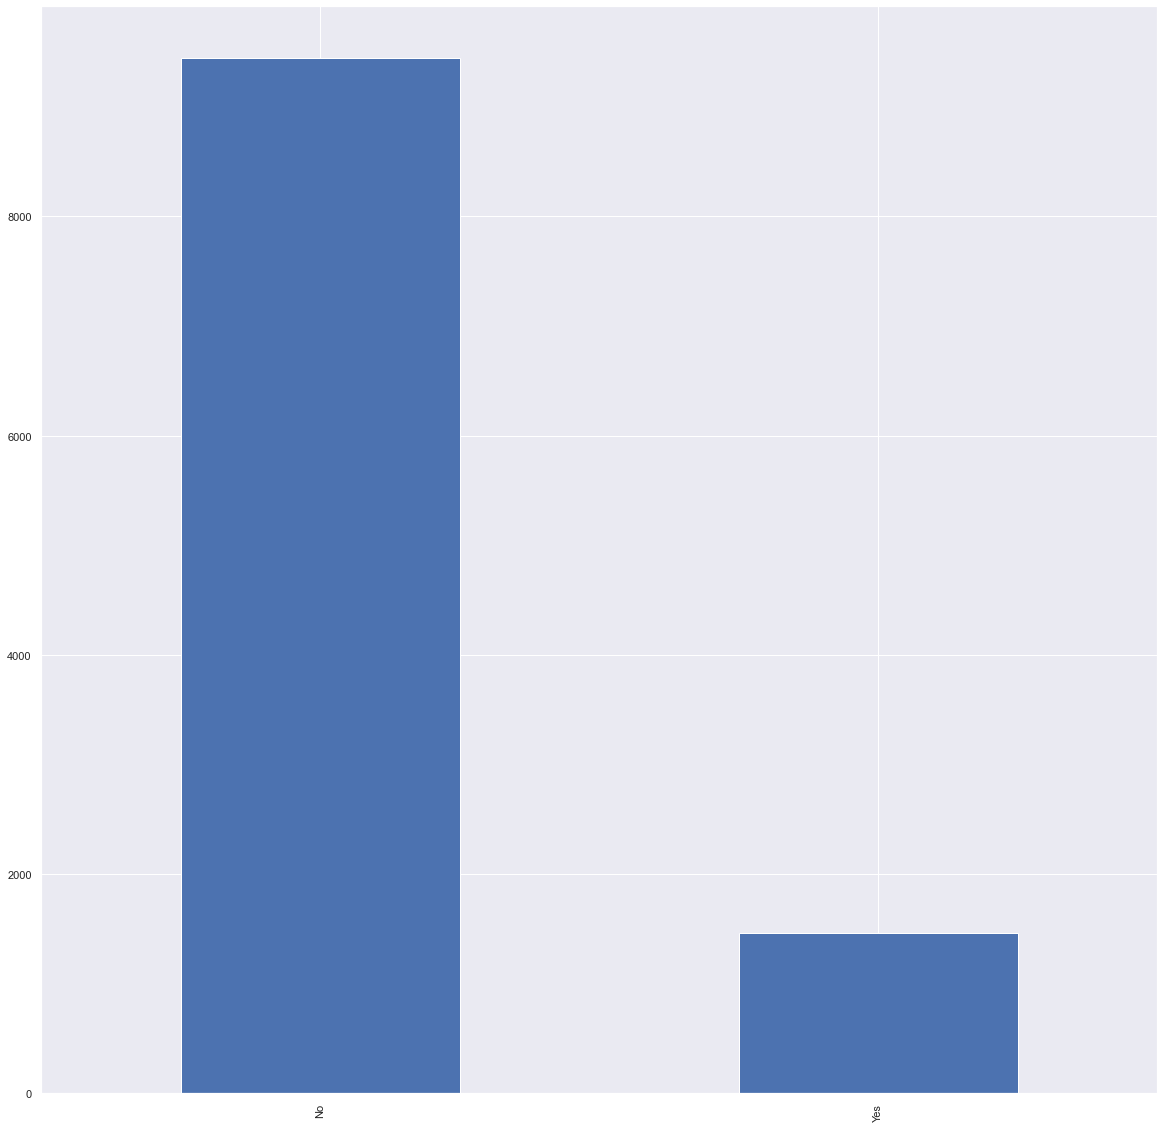

In [488]:
# Show a plot of the total number of responses.
data.Response.value_counts().plot.bar()

In [489]:

# Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
# (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [490]:
# Check the data types of the columns. 
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

In [491]:
# Get the numeric data into dataframe called numerical
numerical = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Month']

In [492]:
# Get the categorical columns in a dataframe called categoricals
categoricals = data.select_dtypes(include=['object']).columns.tolist()
categoricals

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [493]:
# Now we will try to check the normality of the numerical variables visually
# Use seaborn library to construct distribution plots (Verteilungsdiagramme) for the numerical variables

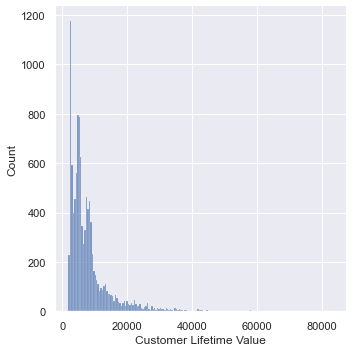

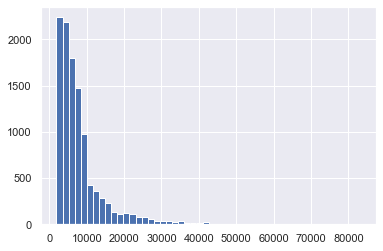

In [494]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.displot(data['Customer Lifetime Value'])
plt.show()
data['Customer Lifetime Value'].hist(bins=50)
plt.show()
# don`t look like normal distribution

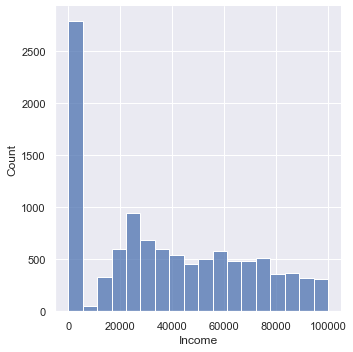

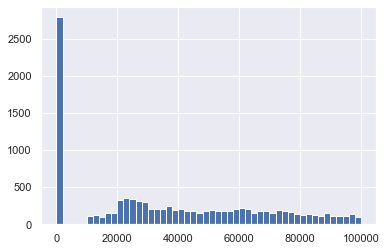

In [495]:
sns.displot(data['Income'])
plt.show()
data['Income'].hist(bins=50)
plt.show()
# don`t look like normal distribution

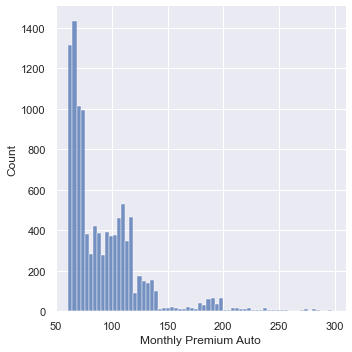

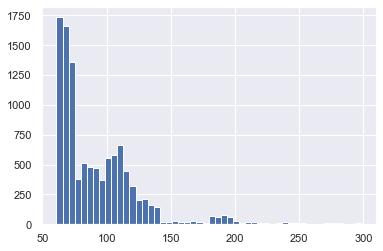

In [496]:
sns.displot(data['Monthly Premium Auto'])
plt.show()
data['Monthly Premium Auto'].hist(bins=50)
plt.show()
# don`t look like normal distribution

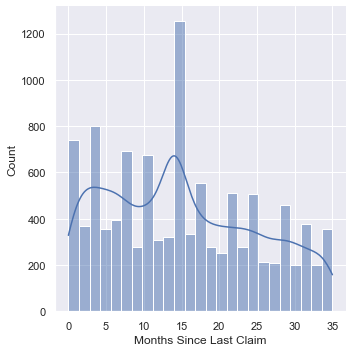

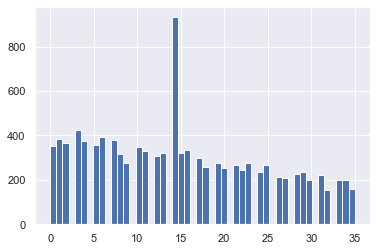

In [497]:
sns.displot(data=data, x="Months Since Last Claim", kde=True)
plt.show()
data['Months Since Last Claim'].hist(bins=50)
plt.show()
# don`t look like normal distribution

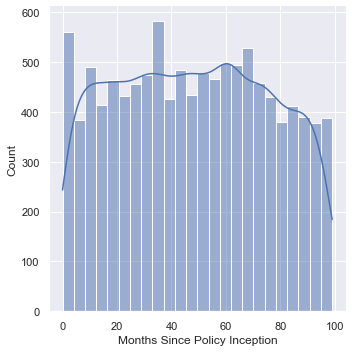

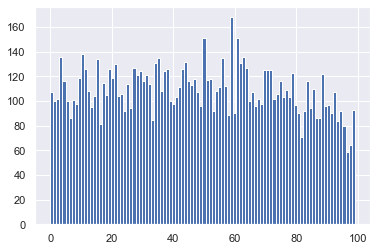

In [498]:
sns.displot(data=data, x="Months Since Policy Inception", kde=True)
plt.show()
data['Months Since Policy Inception'].hist(bins=100)
plt.show()
# don`t look like normal distribution

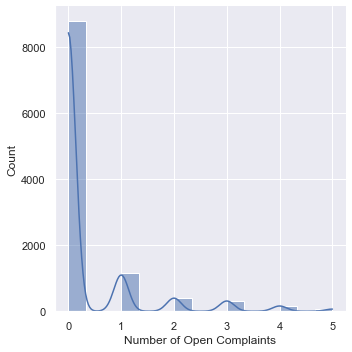

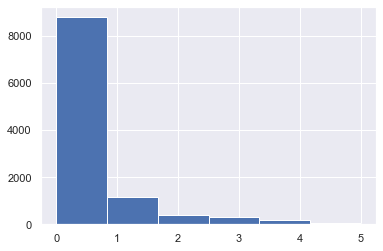

In [499]:
sns.displot(data=data, x="Number of Open Complaints", kde=True)
plt.show()
data['Number of Open Complaints'].hist(bins=6)
plt.show()
# don`t look like normal distribution

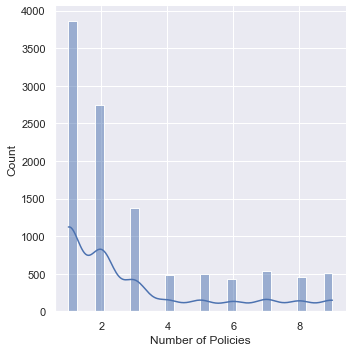

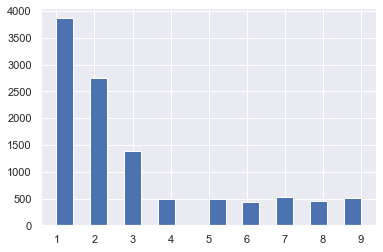

In [500]:
sns.displot(data=data, x="Number of Policies", kde=True)
plt.show()
data['Number of Policies'].hist(bins=18)
plt.show()
# don`t look like normal distribution

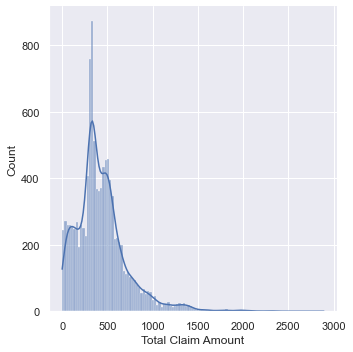

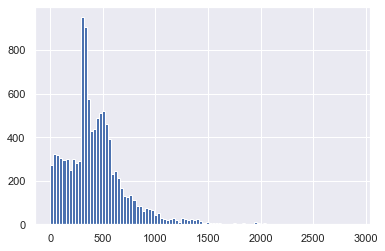

In [501]:
sns.displot(data=data, x="Total Claim Amount", kde=True)
plt.show()
data['Total Claim Amount'].hist(bins=100)
plt.show()
# don`t look like normal distribution

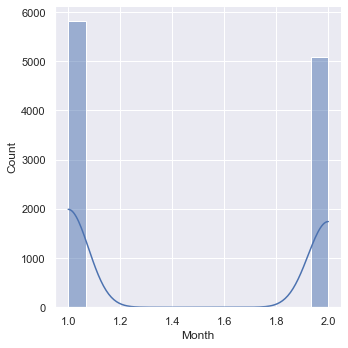

In [519]:
sns.displot(data=data, x="Month", kde=True)
plt.show()
# don`t look like normal distribution

In [503]:
# Do the distributions for different numerical variables look like a normal distribution --> see above

In [504]:
# For the numerical variables, check the multicollinearity between the features. 
# Please note that we will use the column total_claim_amount later as the target variable.

# Multikollinearität (engl. Multicollinearity) liegt vor, wenn mehrere Prädiktoren in einer Regressionsanalyse stark 
# miteinander korrelieren. Man betrachtet bei der Multikollinearität also nicht die Korrelation der Prädiktoren 
# mit dem Kriterium , sondern die Korrelationen der verschiedenen Prädiktoren untereinander.

In [505]:
numerical = data.select_dtypes(include='number')
categorical = data.select_dtypes(include='object')

In [506]:
# correlation matrix
correlations_matrix = numerical.corr()
display(correlations_matrix)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
Customer Lifetime Value,1.000000,0.028306,0.403069,0.015874,0.016960,-0.030616,0.016024,0.232626,-0.009234
Income,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.008425,-0.009960,-0.354141,-0.000443
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010059,-0.020505,0.631799,0.007253
Months Since Last Claim,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.005004,0.006807,0.012340,-0.019666
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004165,-0.009123,0.003095,0.015163
Number of Open Complaints,-0.030616,0.008425,-0.010059,0.005004,0.004165,1.000000,0.001681,-0.012380,-0.005802
Number of Policies,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.001681,1.000000,-0.008923,0.005127
Total Claim Amount,0.232626,-0.354141,0.631799,0.012340,0.003095,-0.012380,-0.008923,1.000000,0.001425
Month,-0.009234,-0.000443,0.007253,-0.019666,0.015163,-0.005802,0.005127,0.001425,1.000000


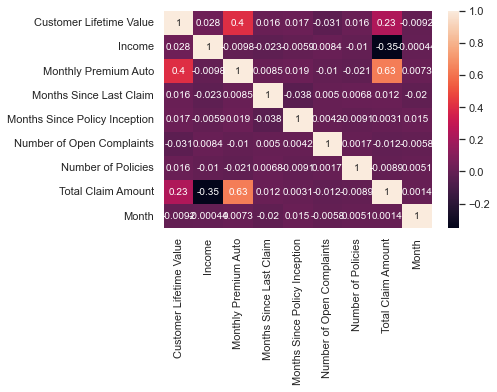

In [507]:
# seaborn heatmap
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [508]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). 
# If there is no pair of features that have a high correlation, then do not drop any features

In [509]:
# no high correlation spotted

In [510]:
# define the label
y = numerical['Total Claim Amount'] 
# define the features
X = numerical.drop(['Total Claim Amount'], axis=1) 
# Linear Regression Model
lm = linear_model.LinearRegression()
#training
lm.fit(X,y) 
print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_)

b0 =  72.69676188695706
b1 =  [-5.50095757e-04 -3.34559359e-03  5.37694298e+00 -3.55690184e-02
 -1.12137714e-01 -1.12982164e+00  9.15427773e-02 -1.95043547e+00]


In [511]:
from sklearn.preprocessing import MinMaxScaler 

y = data['Total Claim Amount']
X = data.drop(['Total Claim Amount'], axis=1)
X_numerical = X.select_dtypes(include = np.number)

In [512]:
X_numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
4,9025.067525,23675,117,14.0,31,0.0,7,1
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.0,7,1
10906,5259.444853,61146,65,7.0,68,0.0,6,1
10907,23893.304100,39837,201,11.0,63,0.0,2,2
10908,11971.977650,64195,158,0.0,27,4.0,6,2


In [513]:
# Normalize (numerical)
trainer = MinMaxScaler().fit(X_numerical) 
X_normalized = trainer.transform(X_numerical) 
print(X_normalized.shape)


(10910, 8)


In [514]:
X_normalized

array([[0.03575222, 0.48038127, 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.00405905, 0.        , 0.01265823, ..., 0.        , 0.        ,
        0.        ],
       [0.16026441, 0.22143207, 0.16455696, ..., 0.        , 0.125     ,
        1.        ],
       ...,
       [0.27012165, 0.3984457 , 0.5907173 , ..., 0.        , 0.125     ,
        1.        ],
       [0.12371724, 0.64207199, 0.4092827 , ..., 0.8       , 0.625     ,
        1.        ],
       [0.06090719, 0.        , 0.16877637, ..., 0.        , 0.25      ,
        0.        ]])

In [515]:
pd.DataFrame(X_normalized, columns=X_numerical.columns)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0
4,0.087527,0.236795,0.236287,0.400000,0.313131,0.0,0.750,0.0
...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.400000,0.404040,0.0,0.750,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0


In [516]:
pd.DataFrame(X_normalized, columns=X_numerical.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,0.075162,0.084555,0.0,0.025992,0.047566,0.087130,1.0
Income,10910.0,0.375434,0.303650,0.0,0.000000,0.338199,0.622626,1.0
Monthly Premium Auto,10910.0,0.135848,0.145327,0.0,0.029536,0.092827,0.202532,1.0
Months Since Last Claim,10910.0,0.430926,0.279635,0.0,0.200000,0.400000,0.657143,1.0
Months Since Policy Inception,10910.0,0.485777,0.282229,0.0,0.242424,0.484848,0.717172,1.0
Number of Open Complaints,10910.0,0.072392,0.178027,0.0,0.000000,0.000000,0.000000,1.0
Number of Policies,10910.0,0.247399,0.299920,0.0,0.000000,0.125000,0.375000,1.0
Month,10910.0,0.466728,0.498915,0.0,0.000000,0.000000,1.000000,1.0


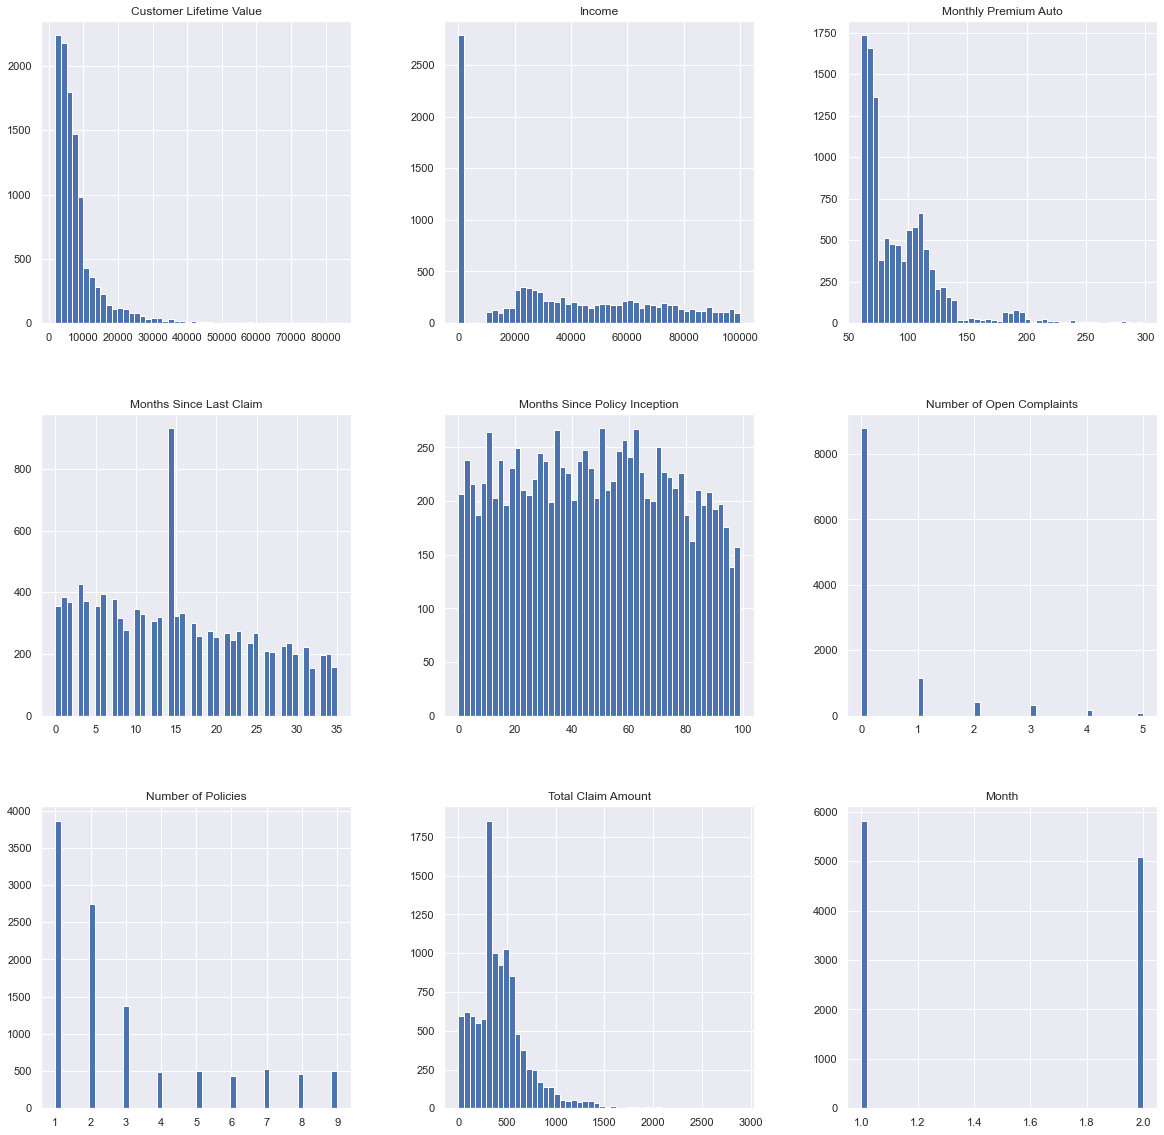

In [521]:
numerical.hist(bins=50)
plt.show()

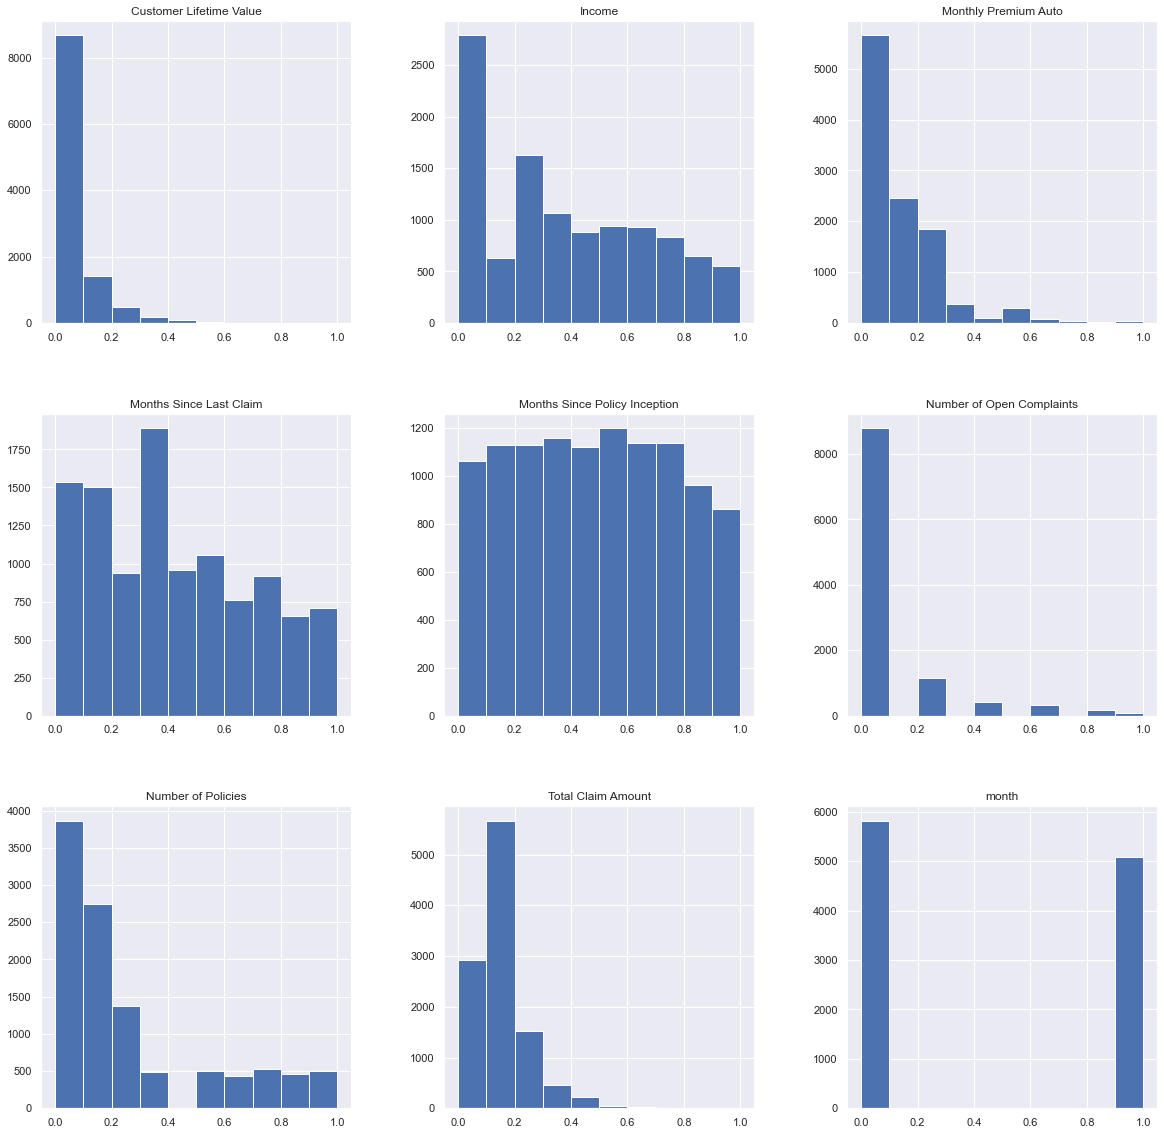

In [523]:
numeric_cols=['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies','Total Claim Amount','month']
numeric_data_minmax = MinMaxScaler().fit_transform(numerical)
pd.DataFrame(numeric_data_minmax, columns=numeric_cols).hist()
plt.show()